# Przygotowanie Danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

odp = 42

In [2]:
datContent = pd.read_csv("data//grafana_data_export_month.csv", delimiter=';')

In [3]:
datContent.head()

,Series,Time,Value
0,clab2189node18,2020-05-25T12:00:00+02:00,12.084716
1,clab2189node18,2020-05-25T14:00:00+02:00,12.322062
2,clab2189node18,2020-05-25T16:00:00+02:00,14.921096
3,clab2189node18,2020-05-25T18:00:00+02:00,14.076305
4,clab2189node18,2020-05-25T20:00:00+02:00,14.147049


In [4]:
datContent.Series.unique()

array(['clab2189node18', 'clab2189node19', 'clab2189node20',
       'clab2189node21'], dtype=object)

In [5]:
datContent.shape

(1492, 3)

In [6]:
datContent.count()

Series    1492
Time      1492
Value     1492
dtype: int64

In [7]:
pd.Series(datContent['Time']).is_unique

False

In [8]:
print(datContent['Series'][0], datContent['Time'][0])
print(datContent['Series'][(1 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(1 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(1 * (datContent.shape[0] // 4))], datContent['Time'][(1 * (datContent.shape[0] // 4))])
print(datContent['Series'][(2 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(2 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(2 * (datContent.shape[0] // 4))], datContent['Time'][(2 * (datContent.shape[0] // 4))])
print(datContent['Series'][(3 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(3 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(3 * (datContent.shape[0] // 4))], datContent['Time'][(3 * (datContent.shape[0] // 4))])
print(datContent['Series'][(4 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(4 * (datContent.shape[0] // 4)) - 1])

clab2189node18 2020-05-25T12:00:00+02:00
clab2189node18 2020-06-25T12:00:00+02:00
---
clab2189node19 2020-05-25T12:00:00+02:00
clab2189node19 2020-06-25T12:00:00+02:00
---
clab2189node20 2020-05-25T12:00:00+02:00
clab2189node20 2020-06-25T12:00:00+02:00
---
clab2189node21 2020-05-25T12:00:00+02:00
clab2189node21 2020-06-25T12:00:00+02:00


In [9]:
print(datContent['Series'][0] == datContent['Series'][(1 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(1 * (datContent.shape[0] // 4))] == datContent['Series'][(2 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(2 * (datContent.shape[0] // 4))] == datContent['Series'][(3 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(3 * (datContent.shape[0] // 4))] == datContent['Series'][(4 * (datContent.shape[0] // 4)) - 1])

print(datContent['Time'][0] == datContent['Time'][(1 * (datContent.shape[0] // 4))] == datContent['Time'][(2 * (datContent.shape[0] // 4))] == datContent['Time'][(3 * (datContent.shape[0] // 4))])
print(datContent['Time'][(1 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(2 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(3 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(4 * (datContent.shape[0] // 4)) - 1])

True
True
True
True
True
True


In [10]:
# drop Time

d = {
    'Time': list(range((1 * (datContent.shape[0] // 4)) - 1)),
    'clab2189node18': datContent['Value'][0:(1 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node19': datContent['Value'][(1 * (datContent.shape[0] // 4)):(2 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node20': datContent['Value'][(2 * (datContent.shape[0] // 4)):(3 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node21': datContent['Value'][(3 * (datContent.shape[0] // 4)):(4 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True)
}


data = pd.DataFrame(d)

In [11]:
data.head()

,Time,clab2189node18,clab2189node19,clab2189node20,clab2189node21
0,0,12.084716,10.252371,13.036339,10.571702
1,1,12.322062,11.515684,13.280995,10.402096
2,2,14.921096,11.169008,10.810635,10.109669
3,3,14.076305,10.069459,11.420577,10.311291
4,4,14.147049,10.283747,10.849504,10.503533


# Wykres!

In [12]:
def plot_data(data, num):
    x = data['Time'].values.tolist()
    if num in [18, 19, 20, 21]:
        y = data['clab2189node' + str(num)].values.tolist()
        plt.figure(figsize=(20,5))
        plt.scatter(x, y, color = 'magenta', alpha = 0.5)
        plt.plot(x, y, color = 'green')
        plt.title(f'Zużycie CPU dla node {num}')
    else:
        y1 = data['clab2189node18'].values.tolist()
        y2 = data['clab2189node19'].values.tolist()
        y3 = data['clab2189node20'].values.tolist()
        y4 = data['clab2189node21'].values.tolist()
        plt.figure(figsize=(20,5))
        plt.plot(x, y1)
        plt.plot(x, y2)
        plt.plot(x, y3)
        plt.plot(x, y4)
        plt.title(f'Zużycie CPU dla wszystkich')
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [13]:
def plot_dataXY(x, y, title):
    plt.figure(figsize=(20,5))
    plt.scatter(x, y, color = 'magenta', alpha = 0.5)
    plt.title(title)
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [14]:
def plot_dataXY2(x1, y1, x2, y2, title):
    plt.figure(figsize=(20,5))
    plt.scatter(x1, y1, color = 'green', alpha = 0.5)
    plt.scatter(x2, y2, color = 'magenta', alpha = 0.5)
    plt.title(title)
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
Time              372 non-null int64
clab2189node18    372 non-null float64
clab2189node19    372 non-null float64
clab2189node20    372 non-null float64
clab2189node21    372 non-null float64
dtypes: float64(4), int64(1)
memory usage: 14.7 KB


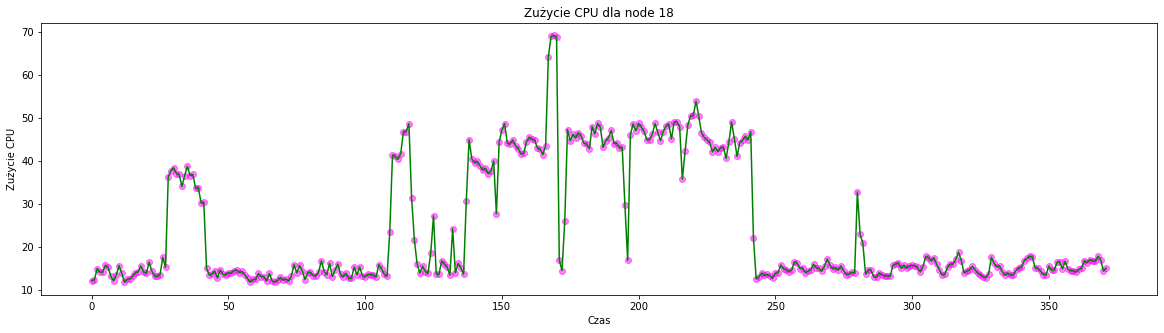

In [16]:
plot_data(data, num=18)

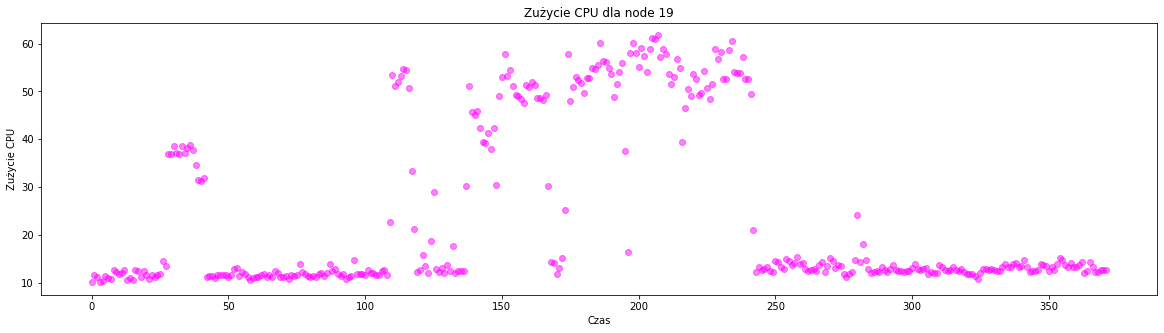

In [17]:
plot_dataXY(x=data['Time'].values.tolist(), y=data['clab2189node19'].values.tolist(), title='Zużycie CPU dla node 19')

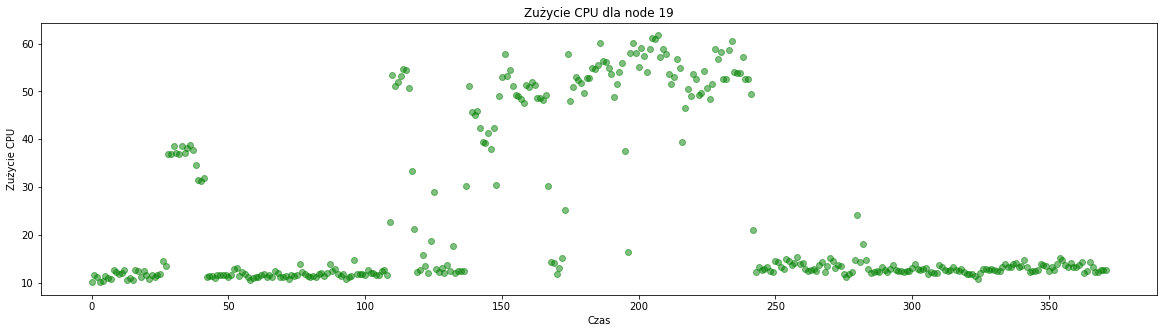

In [18]:
plot_dataXY2(x1=data['Time'].values.tolist()[:400], y1=data['clab2189node19'].values.tolist()[:400],
            x2=data['Time'].values.tolist()[400:], y2=data['clab2189node19'].values.tolist()[400:],
            title='Zużycie CPU dla node 19')

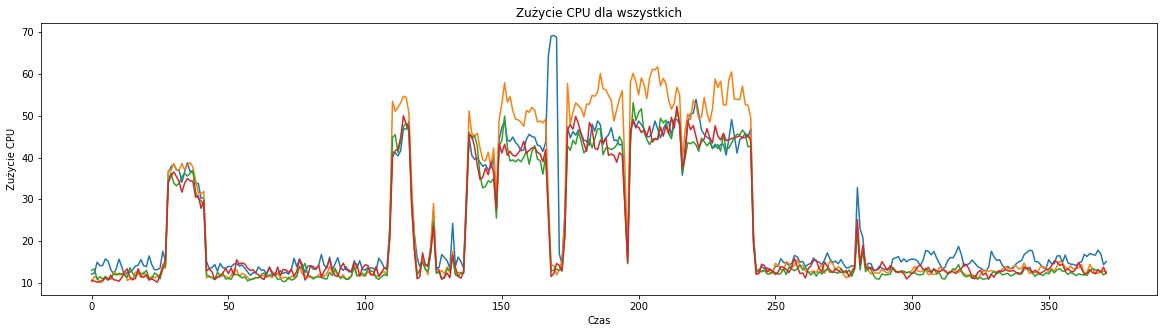

In [19]:
plot_data(data, num=False)

# Model regresji

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def run(model, name, data):

    # dane "czasowe"
    X = data.iloc[:,0:1].values.astype(float)

    # dane wartości
    y_node18 = data.iloc[:,1:2].values.astype(float)
    y_node19 = data.iloc[:,2:3].values.astype(float)
    y_node20 = data.iloc[:,3:4].values.astype(float)
    y_node21 = data.iloc[:,4:5].values.astype(float)
    
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X = sc_X.fit_transform(X)
    y_node18 = sc_y.fit_transform(y_node18)
    y_node19 = sc_y.fit_transform(y_node19)
    y_node20 = sc_y.fit_transform(y_node20)
    y_node21 = sc_y.fit_transform(y_node21)
    
    tRMSE_18 = 0
    tRMSE_19 = 0
    tRMSE_20 = 0
    tRMSE_21 = 0

    for i in range(0, 5):
        X_train_n18, X_test_n18, y_train_n18, y_test_n18 = train_test_split(X, y_node18, test_size=0.3, random_state=odp)
        X_train_n19, X_test_n19, y_train_n19, y_test_n19 = train_test_split(X, y_node19, test_size=0.3, random_state=odp)
        X_train_n20, X_test_n20, y_train_n20, y_test_n20 = train_test_split(X, y_node20, test_size=0.3, random_state=odp)
        X_train_n21, X_test_n21, y_train_n21, y_test_n21 = train_test_split(X, y_node21, test_size=0.3, random_state=odp)

        model_18 = model
        model_18.fit(X_train_n18, y_train_n18.ravel())

        model_19 = model
        model_19.fit(X_train_n19, y_train_n19.ravel())

        model_20 = model
        model_20.fit(X_train_n20, y_train_n20.ravel())

        model_21 = model
        model_21.fit(X_train_n21, y_train_n21.ravel())
        
        y_pred_n18 = model_18.predict(X_test_n18)
        y_pred_n19 = model_19.predict(X_test_n19)
        y_pred_n20 = model_20.predict(X_test_n20)
        y_pred_n21 = model_21.predict(X_test_n21)

        mse_18 = mean_squared_error(y_test_n18, y_pred_n18)
        rmse_18 = np.sqrt(mse_18)

        mse_19 = mean_squared_error(y_test_n19, y_pred_n19)
        rmse_19 = np.sqrt(mse_19)

        mse_20 = mean_squared_error(y_test_n20, y_pred_n20)
        rmse_20 = np.sqrt(mse_20)

        mse_21 = mean_squared_error(y_test_n21, y_pred_n21)
        rmse_21 = np.sqrt(mse_21)

        tRMSE_18 += rmse_18
        tRMSE_19 += rmse_19
        tRMSE_20 += rmse_20
        tRMSE_21 += rmse_21
    
    print(f'{name}:\n')
    print(f'rmse_18: {tRMSE_18/5},\nrmse_19: {tRMSE_19/5},\nrmse_20: {tRMSE_20/5},\nrmse_21: {tRMSE_21/5},\n')
    print(f'SUM: {tRMSE_18/5 + tRMSE_19/5 + tRMSE_20/5 + tRMSE_21/5}')
    
    plot_dataXY2(x1=X_test_n18, y1=y_test_n18,
                 x2=X_test_n18, y2=y_pred_n18,
                 title='różnica między prawdą a predykcją dla node 18')
    plot_dataXY2(x1=X_test_n19, y1=y_test_n19,
                 x2=X_test_n19, y2=y_pred_n19,
                 title='różnica między prawdą a predykcją dla node 19')
    plot_dataXY2(x1=X_test_n20, y1=y_test_n20,
                 x2=X_test_n20, y2=y_pred_n20,
                 title='różnica między prawdą a predykcją dla node 20')
    plot_dataXY2(x1=X_test_n21, y1=y_test_n21,
                 x2=X_test_n21, y2=y_pred_n21,
                 title='różnica między prawdą a predykcją dla node 21')
    
    return [name, tRMSE_18/5, tRMSE_19/5, tRMSE_20/5, tRMSE_21/5, tRMSE_18/5 + tRMSE_19/5 + tRMSE_20/5 + tRMSE_21/5]
    
    

# SVR

SVR_rbf:

rmse_18: 0.567114777056445,
rmse_19: 0.5814135380048805,
rmse_20: 0.6083121915307482,
rmse_21: 0.6144175209507579,

SUM: 2.371258027542831


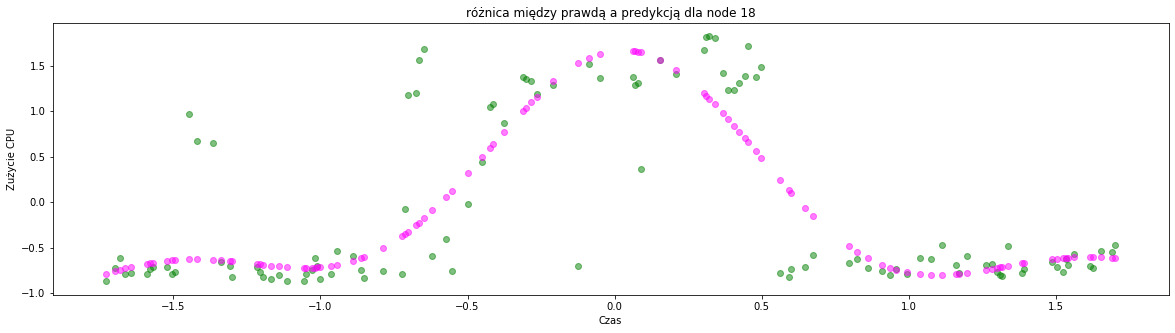

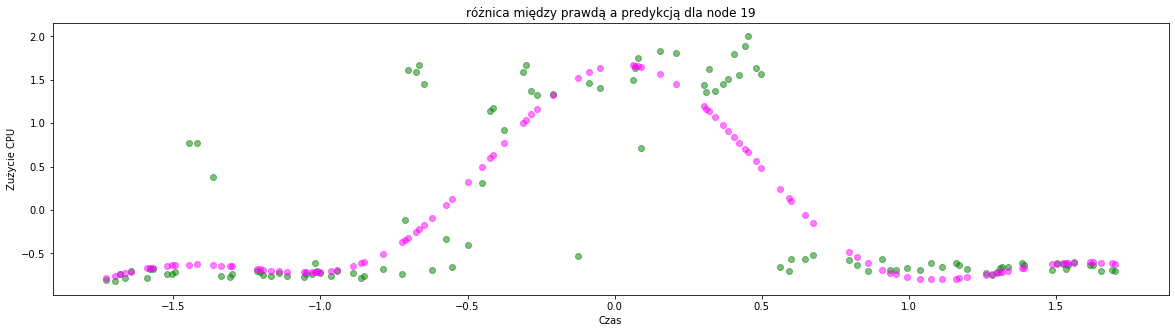

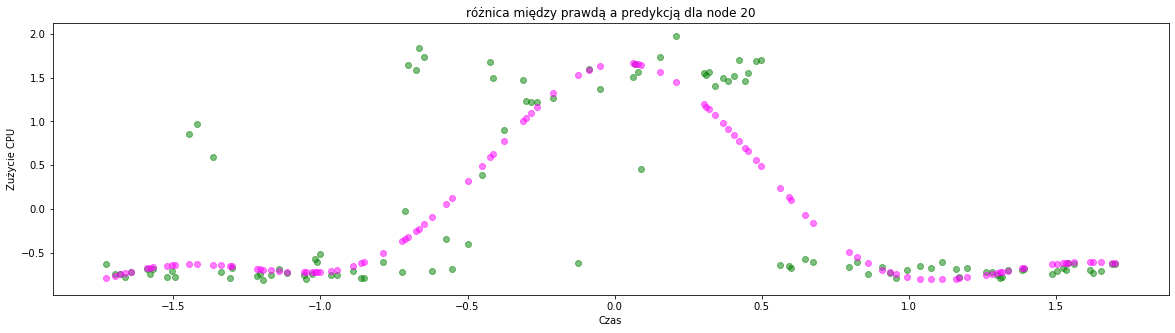

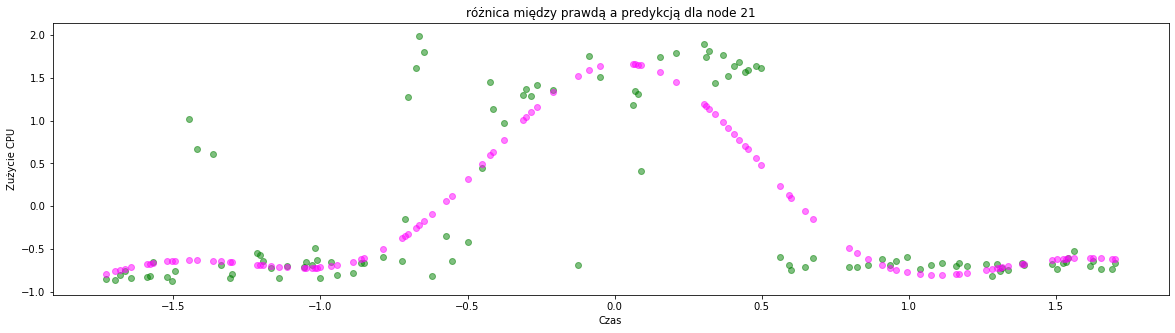

In [21]:
SVR_rbf = run(model=SVR(kernel='rbf'), data=data, name='SVR_rbf')

SVR_poly:

rmse_18: 1.0820296532827307,
rmse_19: 1.1436814102087125,
rmse_20: 1.145055317581252,
rmse_21: 1.1484181586864286,

SUM: 4.519184539759124


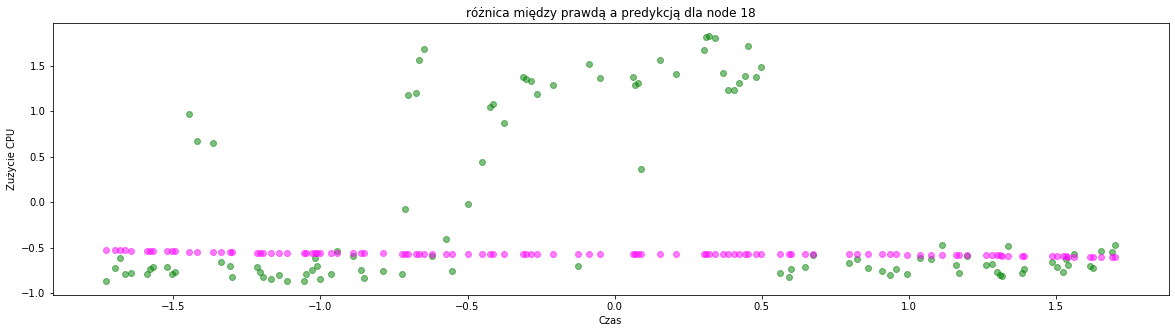

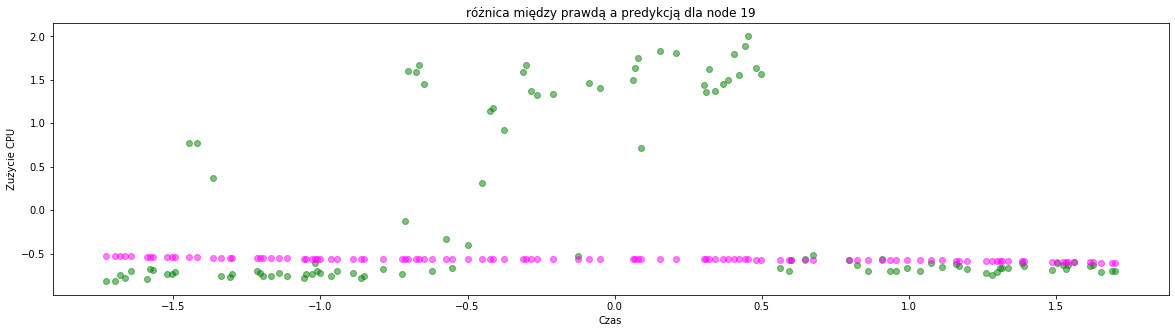

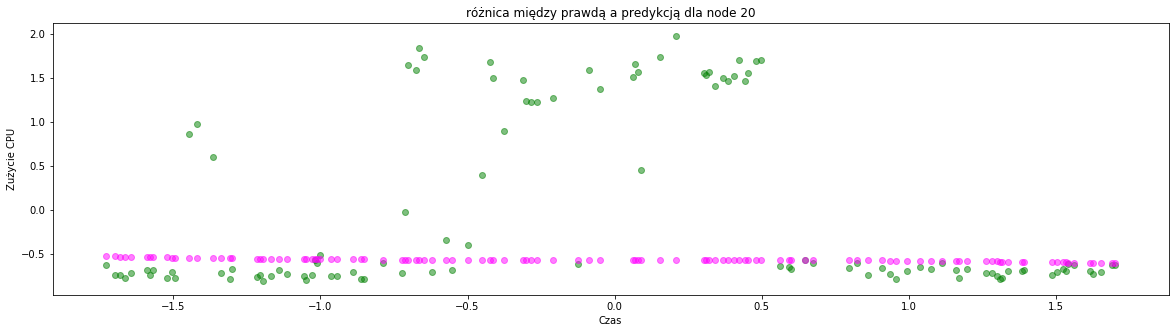

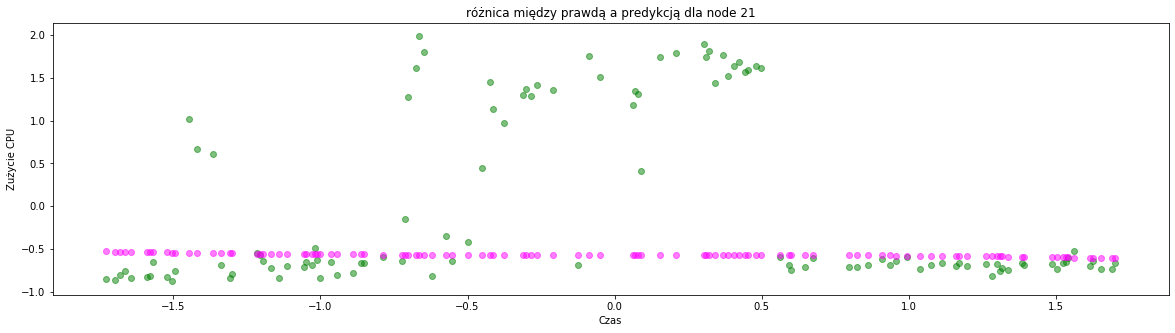

In [22]:
SVR_poly = run(model=SVR(kernel='poly'), data=data, name='SVR_poly')

LinearSVR:

rmse_18: 1.1013966102992296,
rmse_19: 1.1638737010477593,
rmse_20: 1.1647848148340652,
rmse_21: 1.16803242130444,

SUM: 4.598087547485495


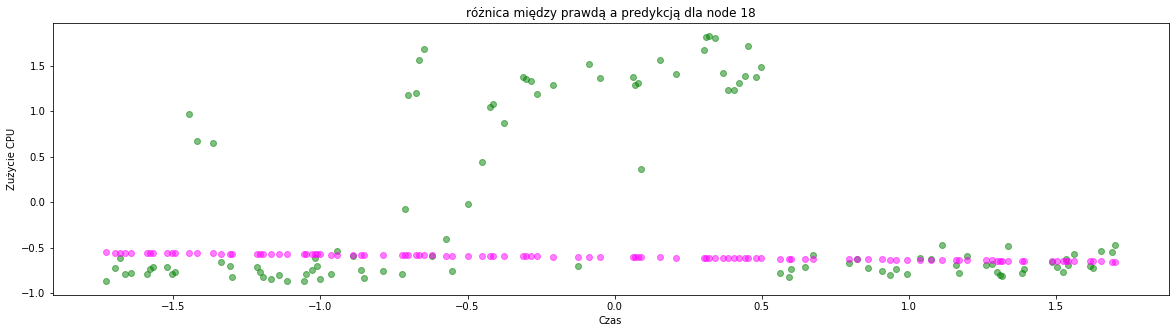

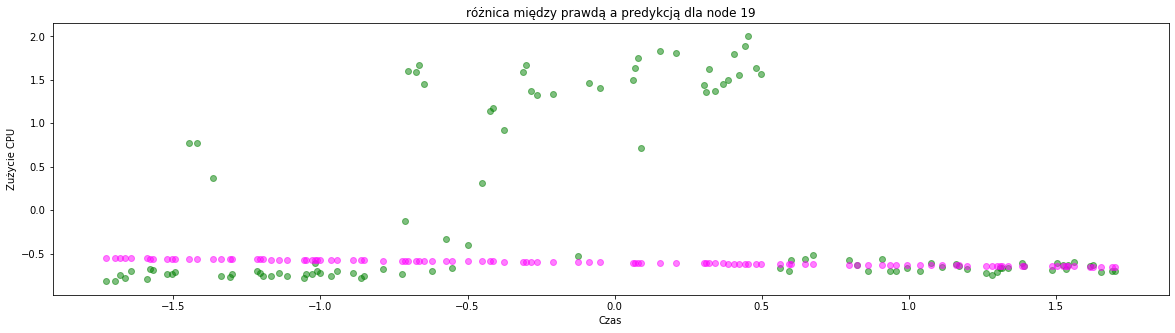

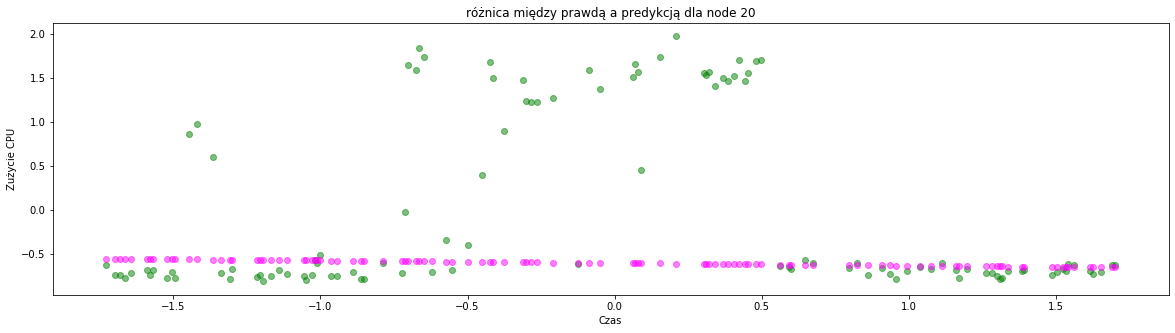

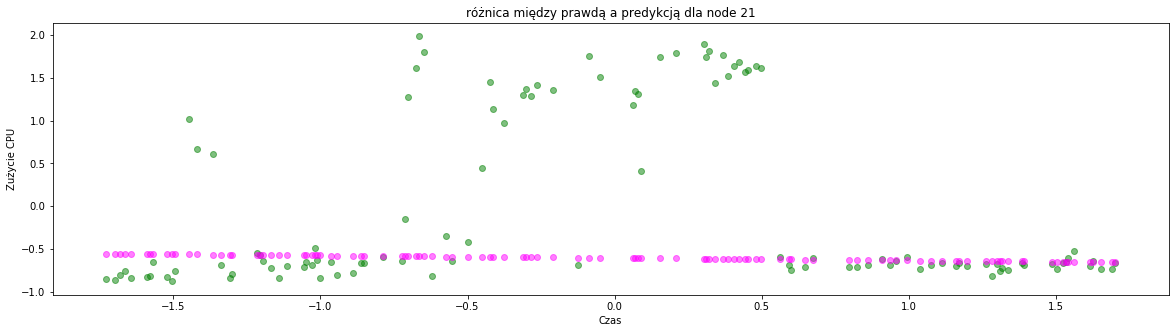

In [23]:
from sklearn.svm import LinearSVR

LinearSVR = run(model=LinearSVR(), data=data, name='LinearSVR')

NuSVR:

rmse_18: 0.5661281075312097,
rmse_19: 0.581242188675999,
rmse_20: 0.6075665538831728,
rmse_21: 0.6144775602764566,

SUM: 2.369414410366838


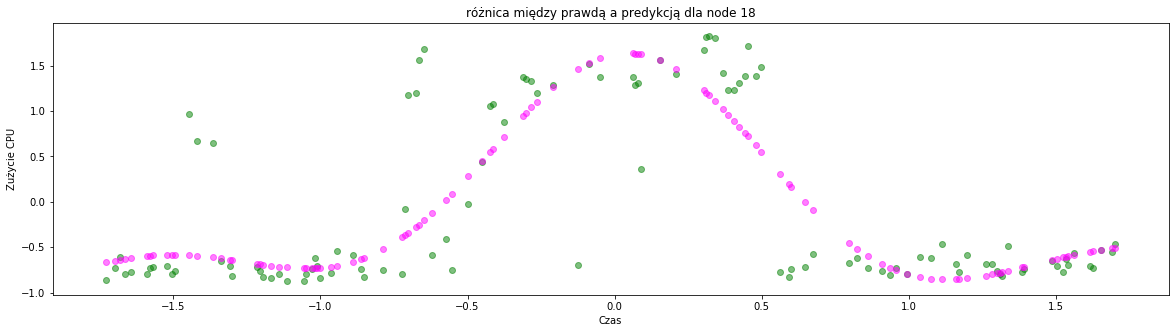

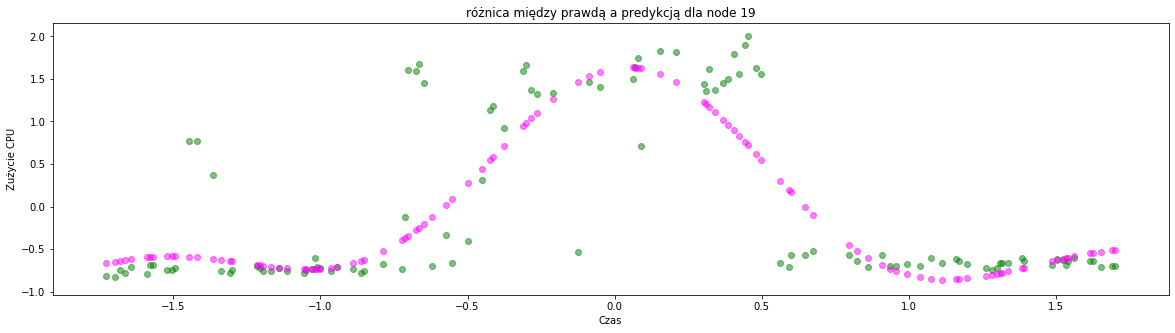

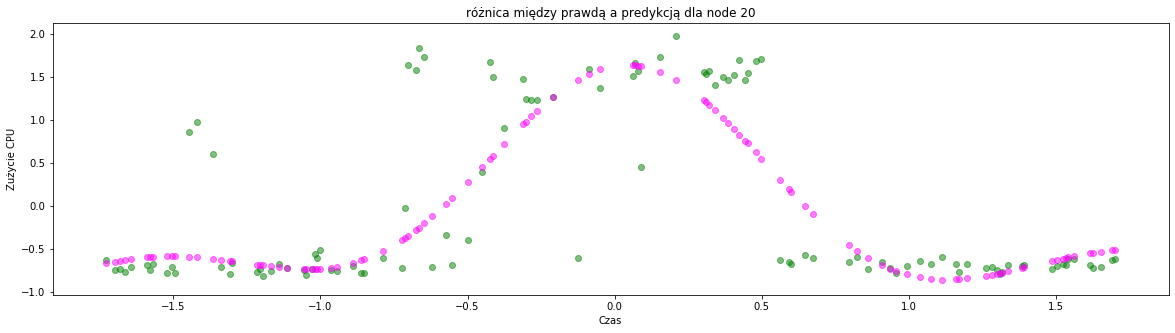

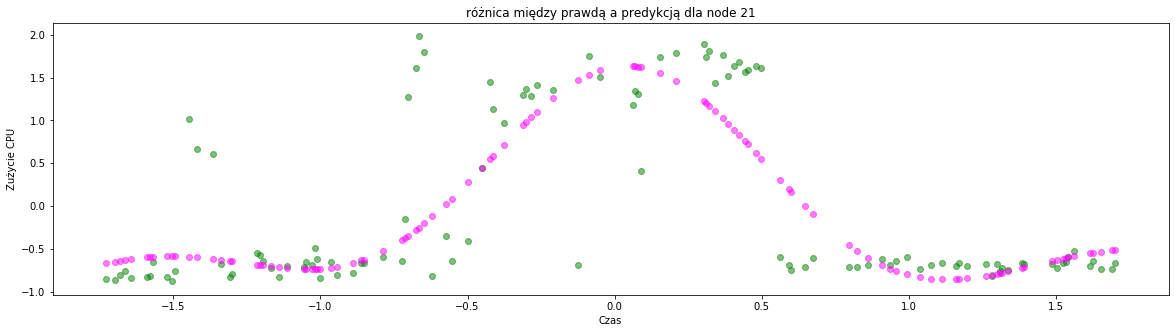

In [24]:
from sklearn.svm import NuSVR

NuSVR = run(model=NuSVR(), data=data, name='NuSVR')

DecisionTree_Regressor(42):

rmse_18: 0.32923563324302557,
rmse_19: 0.3443181873249659,
rmse_20: 0.32571470166823985,
rmse_21: 0.298598601561766,

SUM: 1.2978671237979973


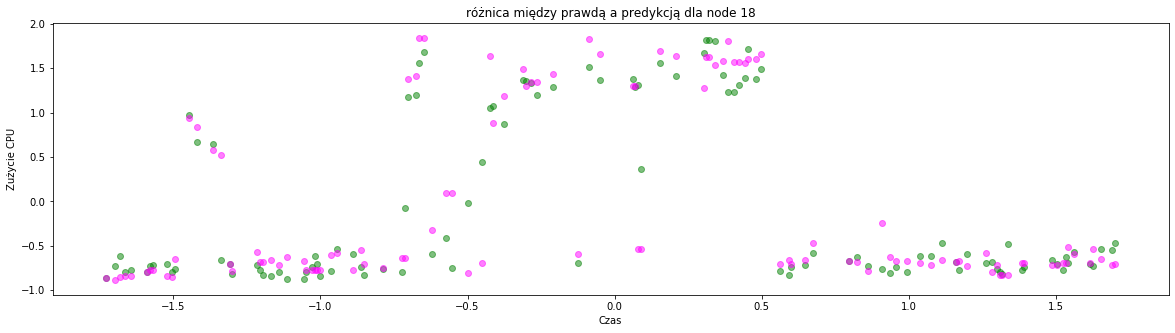

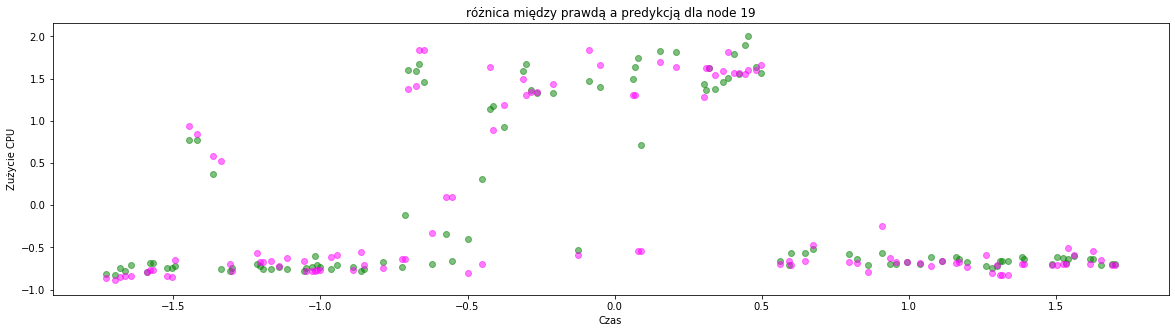

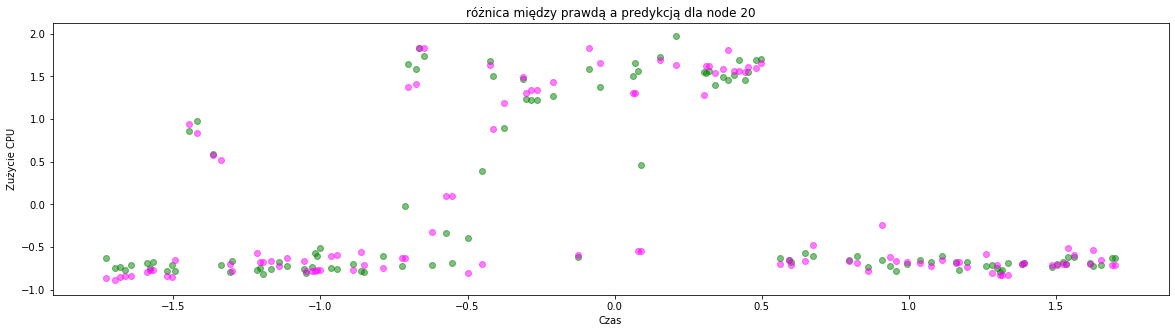

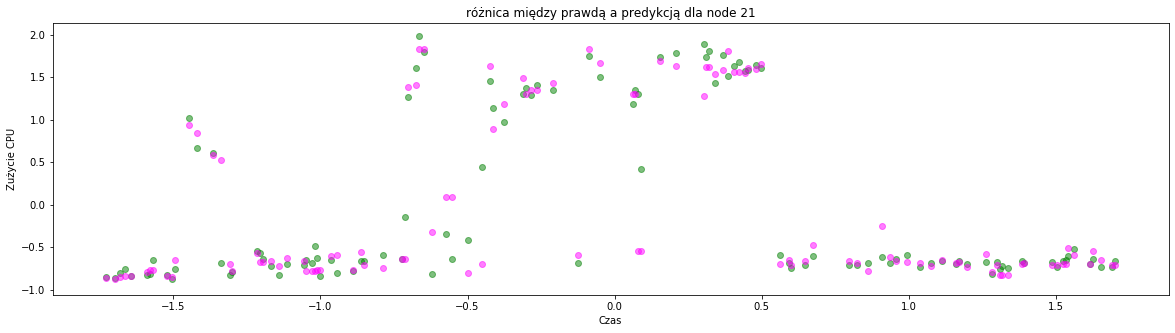

In [25]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_Regressor = run(model=DecisionTreeRegressor(random_state=odp), data=data, name='DecisionTree_Regressor(42)')

# Modele liniowe

Linear_Regression:

rmse_18: 0.9594419636049512,
rmse_19: 1.0011284610607654,
rmse_20: 1.0015153748604786,
rmse_21: 1.009228033420581,

SUM: 3.971313832946776


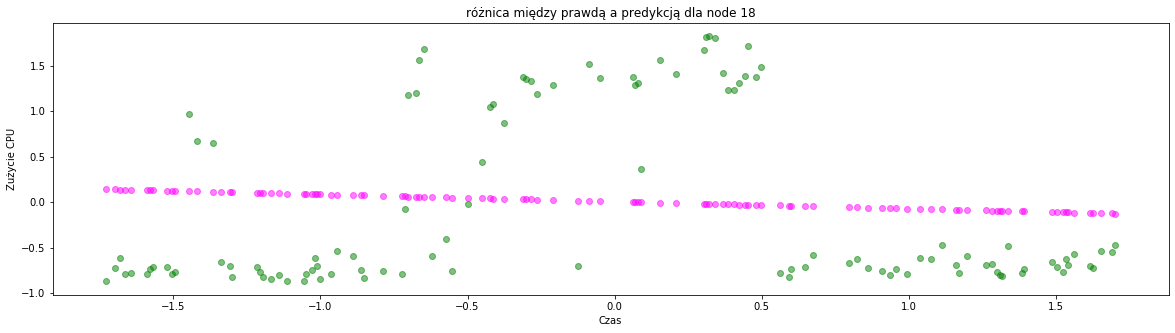

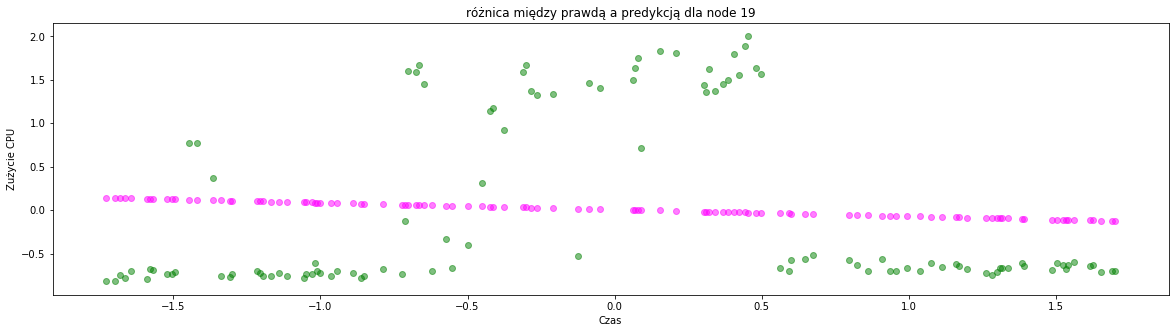

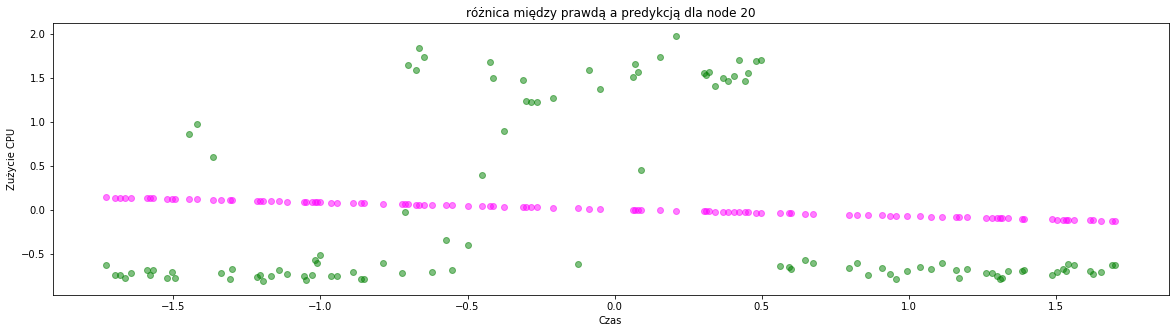

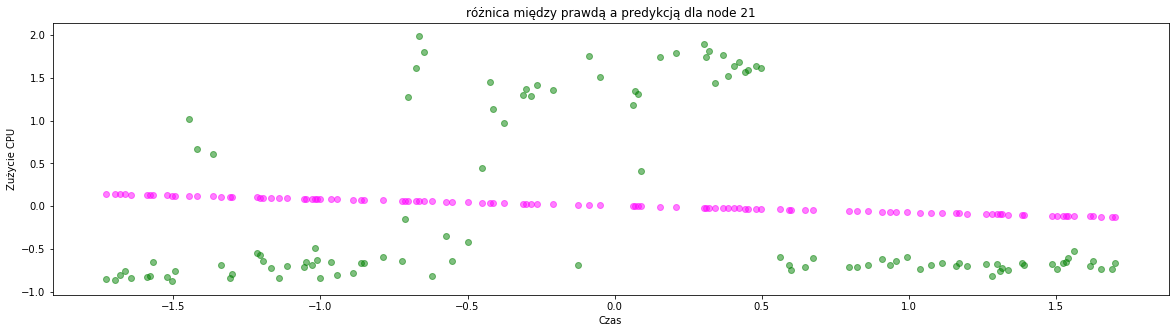

In [26]:
from sklearn.linear_model import LinearRegression

Linear_Regression = run(model=LinearRegression(), data=data, name='Linear_Regression')

Huber_Regression:

rmse_18: 1.030136825930972,
rmse_19: 1.089448439862017,
rmse_20: 1.090323280438337,
rmse_21: 1.094714943604646,

SUM: 4.304623489835972


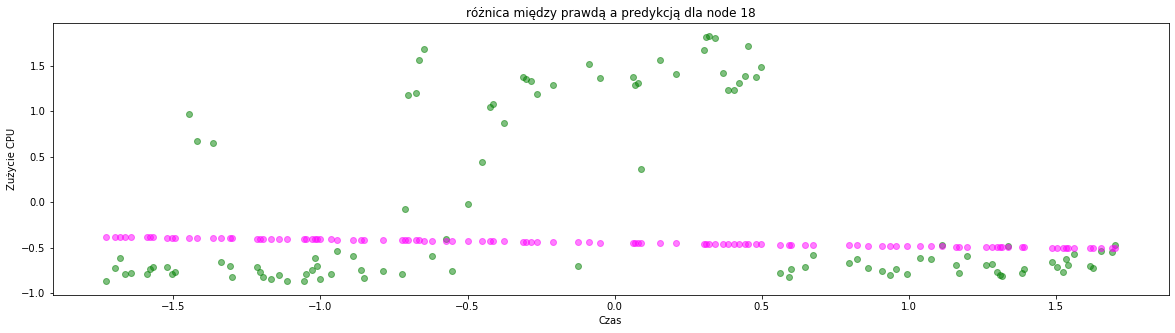

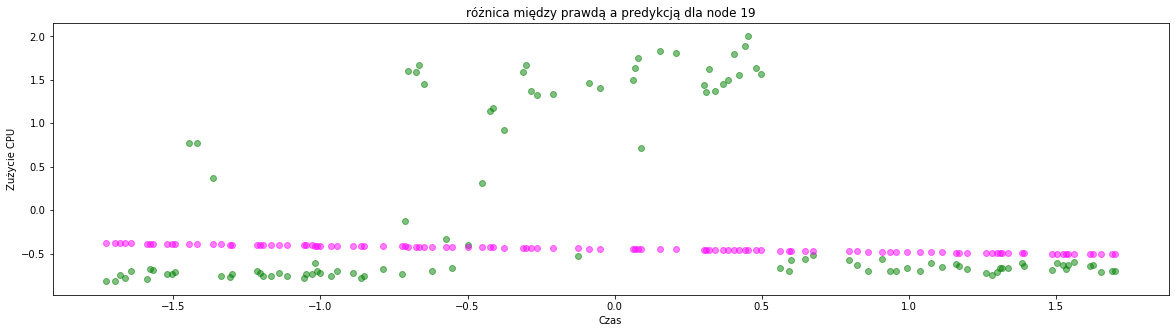

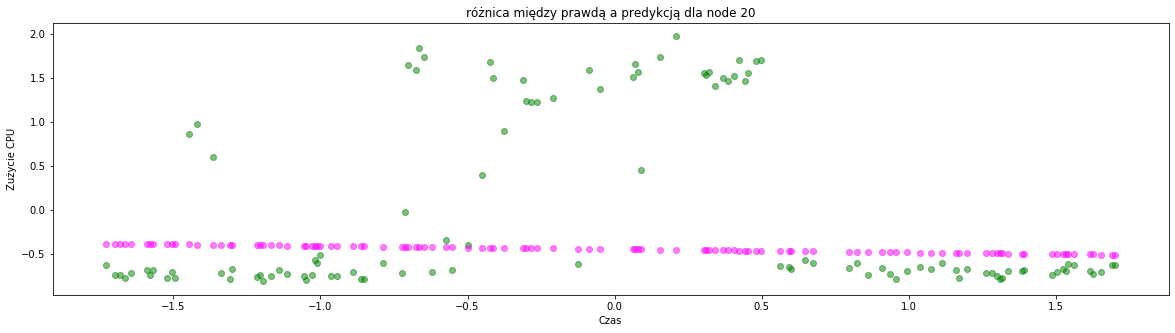

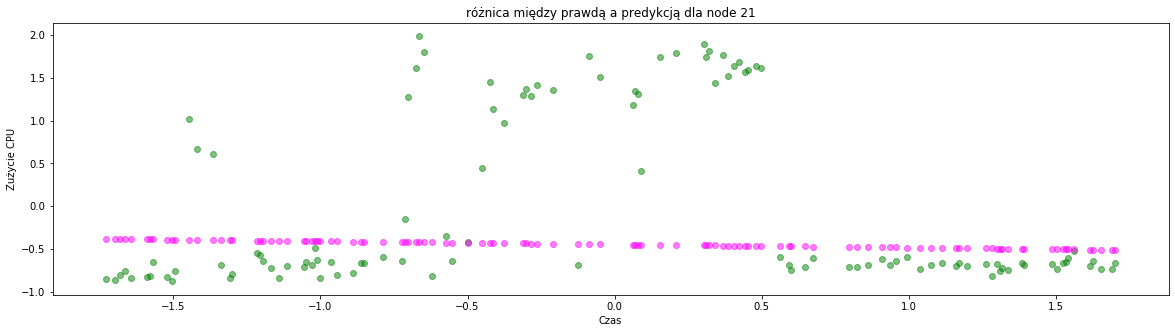

In [27]:
from sklearn.linear_model import HuberRegressor

Huber_Regression = run(model=HuberRegressor(), data=data, name='Huber_Regression')

Theil_Sen_Regressor:

rmse_18: 0.9907069411653788,
rmse_19: 1.046434352057253,
rmse_20: 1.0476195448542929,
rmse_21: 1.0527373285579977,

SUM: 4.137498166634923


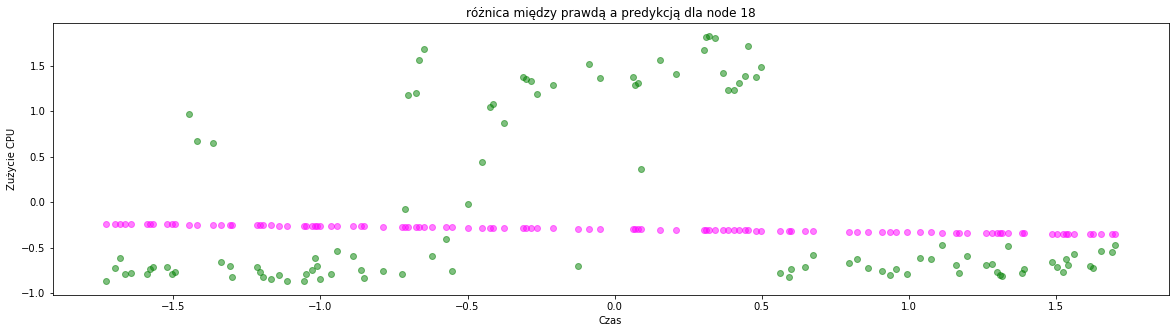

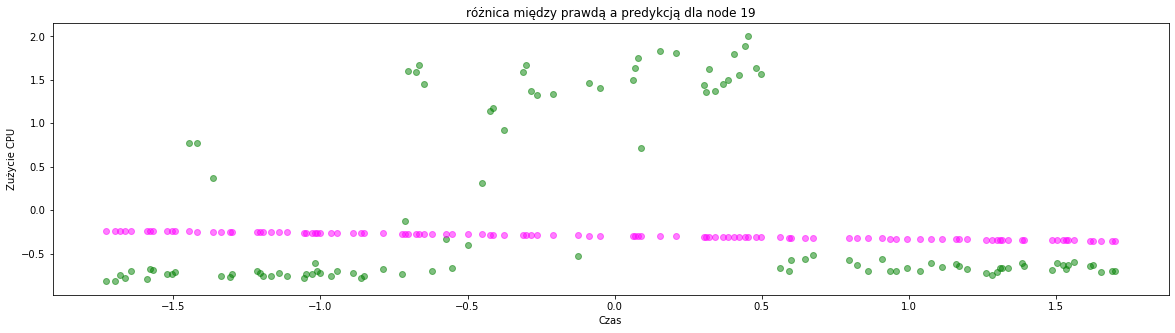

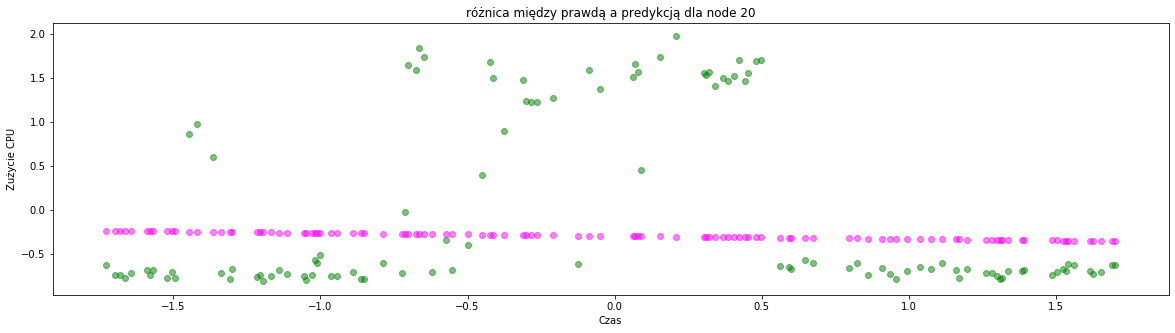

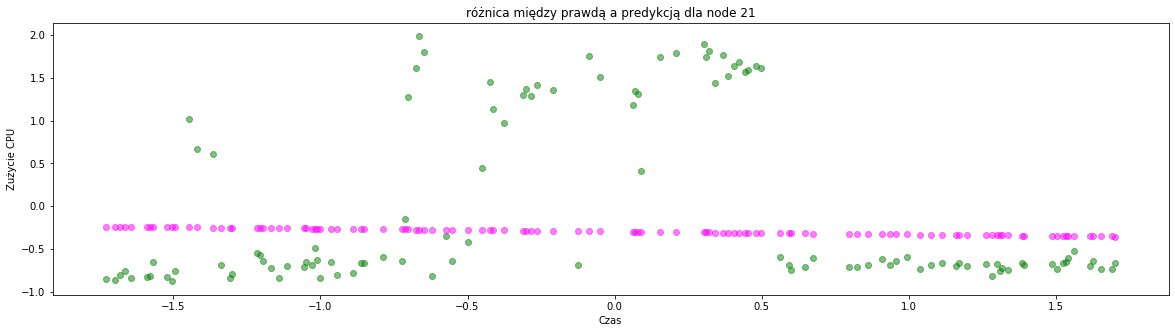

In [28]:
from sklearn.linear_model import TheilSenRegressor

Theil_Sen_Regressor = run(model=TheilSenRegressor(), data=data, name='Theil_Sen_Regressor')

# N sąsiadów

KNeighbors_Regressor(5):

rmse_18: 0.2902738531019275,
rmse_19: 0.2838682213232809,
rmse_20: 0.31234331456160486,
rmse_21: 0.2926005534863233,

SUM: 1.1790859424731366


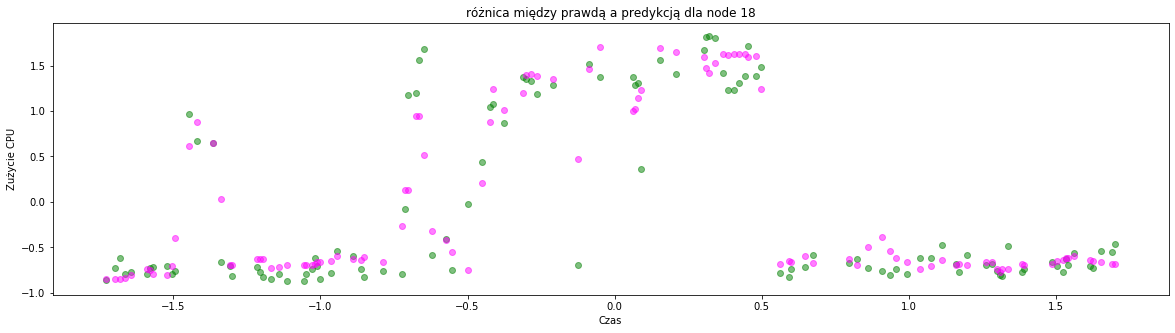

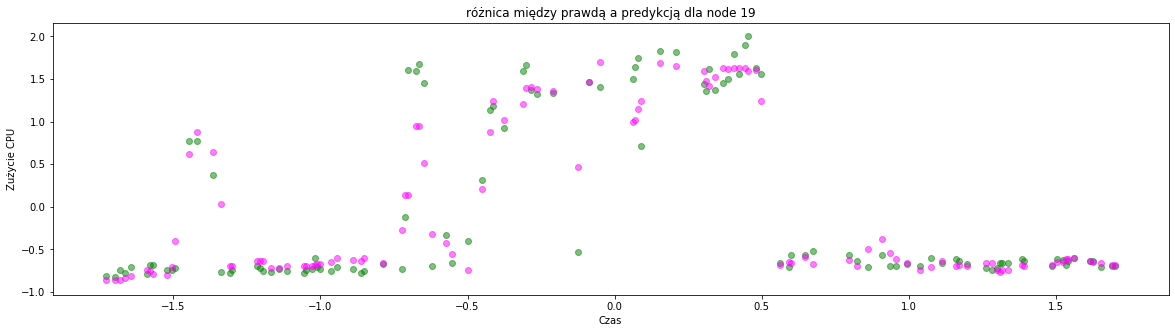

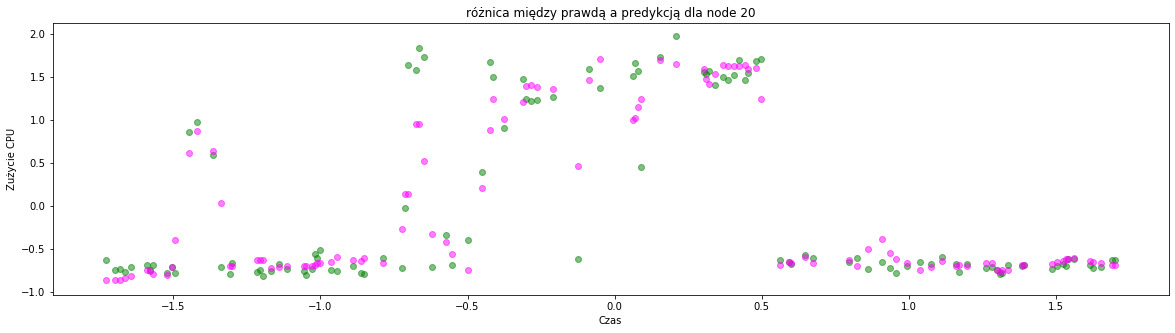

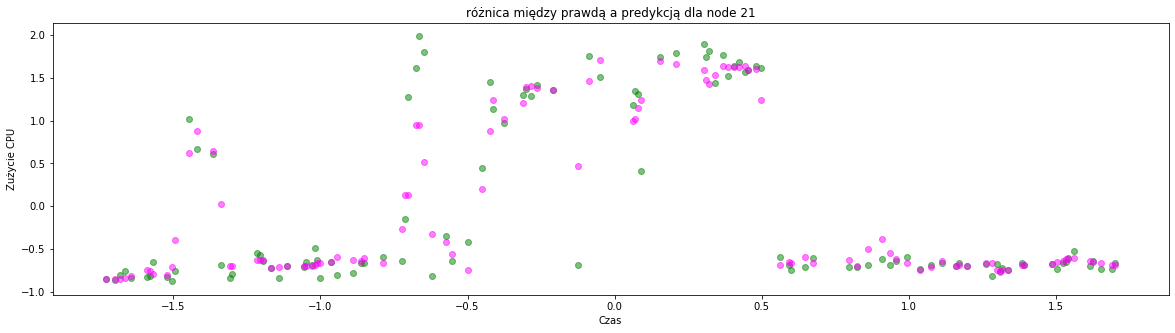

In [29]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_Regressor_5 = run(model=KNeighborsRegressor(), data=data, name='KNeighbors_Regressor(5)')

KNeighbors_Regressor(2):

rmse_18: 0.22373843350396366,
rmse_19: 0.19947775543817206,
rmse_20: 0.19642014324194884,
rmse_21: 0.18102674358846493,

SUM: 0.8006630757725495


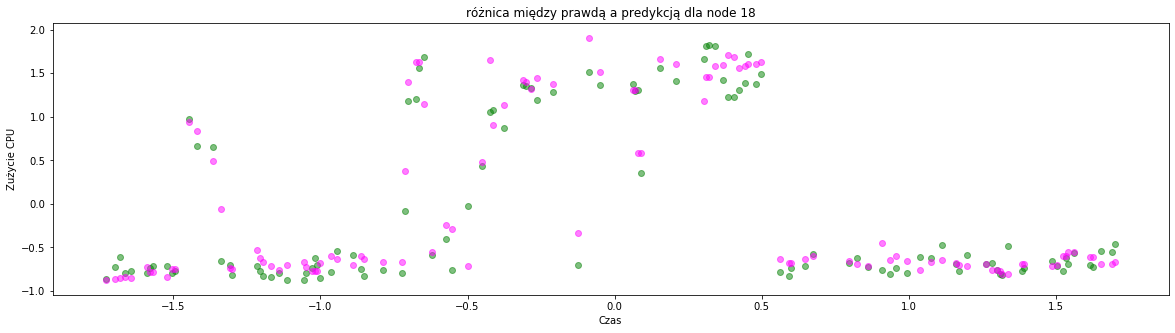

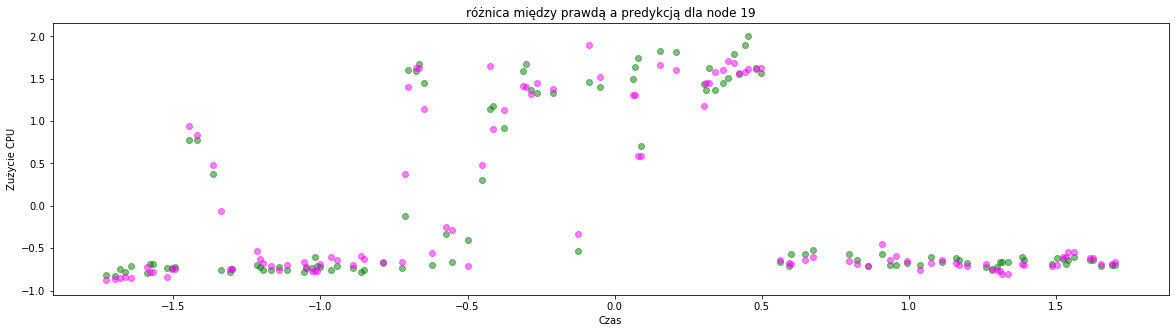

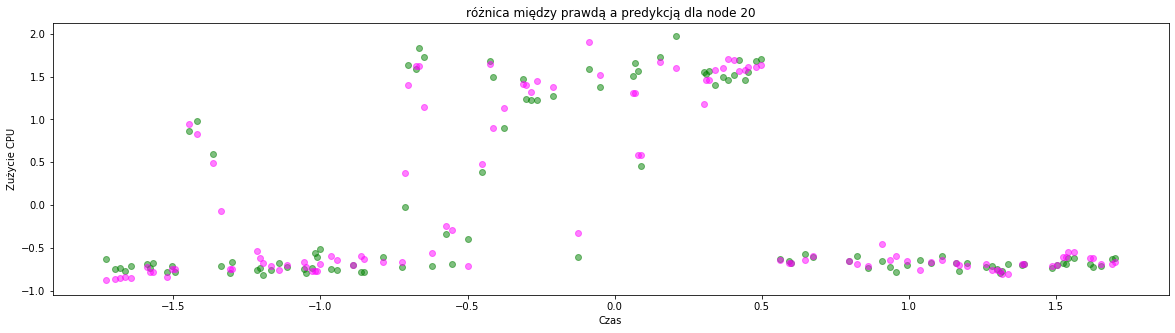

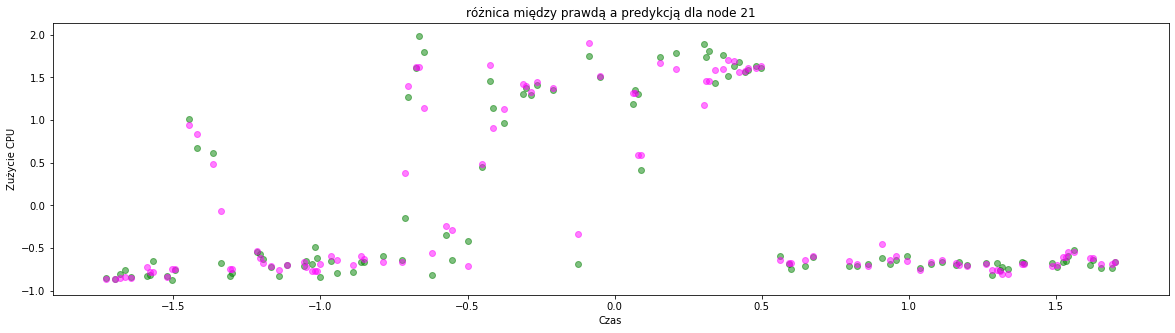

In [30]:
from sklearn.neighbors import KNeighborsRegressor

KNeighbors_Regressor_2 = run(model=KNeighborsRegressor(n_neighbors=2), data=data, name='KNeighbors_Regressor(2)')

RadiusNeighbors_Regressor(0.1):

rmse_18: 0.4354871957068567,
rmse_19: 0.4495635830011707,
rmse_20: 0.4812759931400502,
rmse_21: 0.47792945449746405,

SUM: 1.8442562263455415


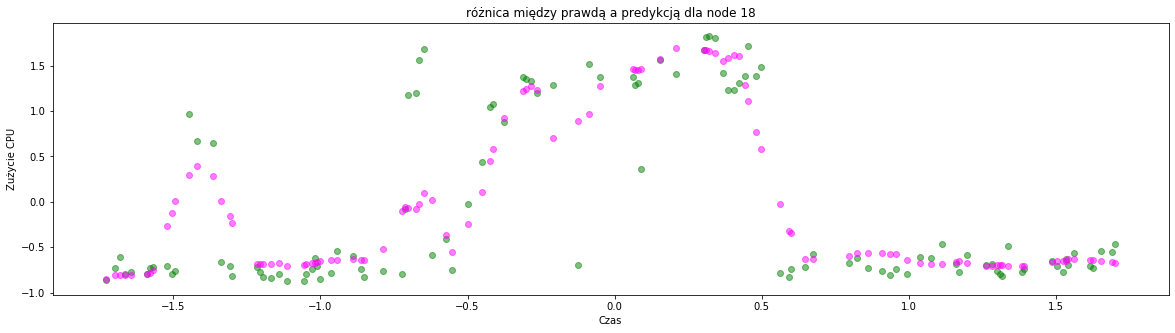

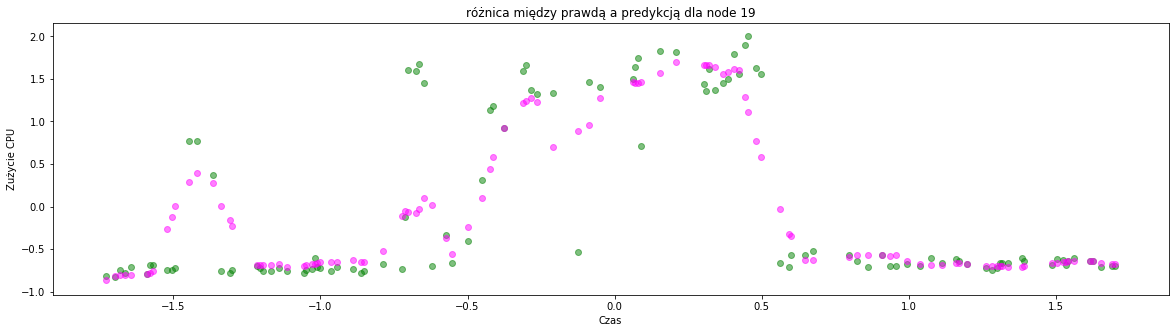

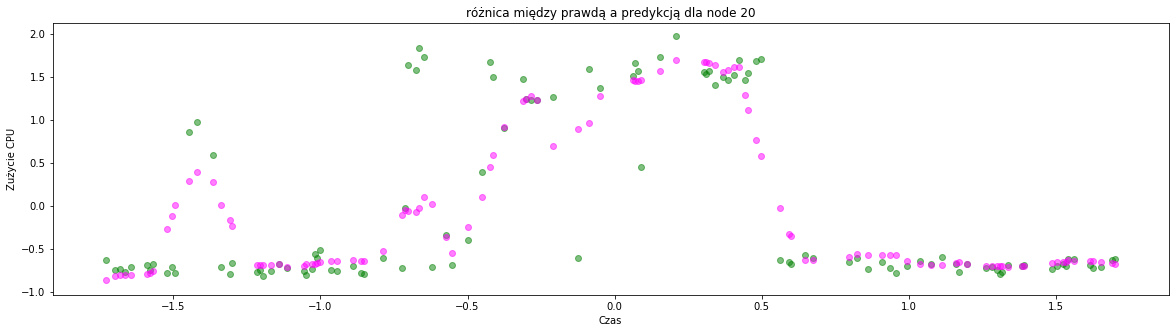

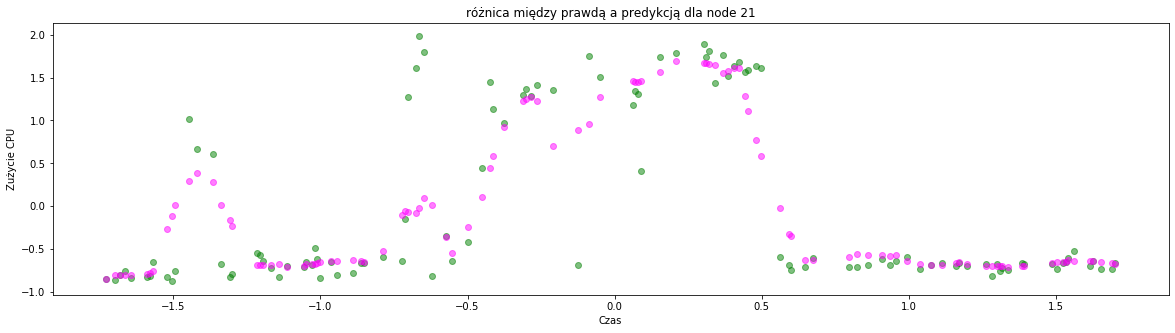

In [31]:
from sklearn.neighbors import RadiusNeighborsRegressor

RadiusNeighbors_Regressor = run(model=RadiusNeighborsRegressor(radius=0.1), data=data, name='RadiusNeighbors_Regressor(0.1)')

RadiusNeighbors_Regressor(0.3):

rmse_18: 0.5752158947839187,
rmse_19: 0.6012014817956801,
rmse_20: 0.6192300187723713,
rmse_21: 0.6245307643040062,

SUM: 2.4201781596559764


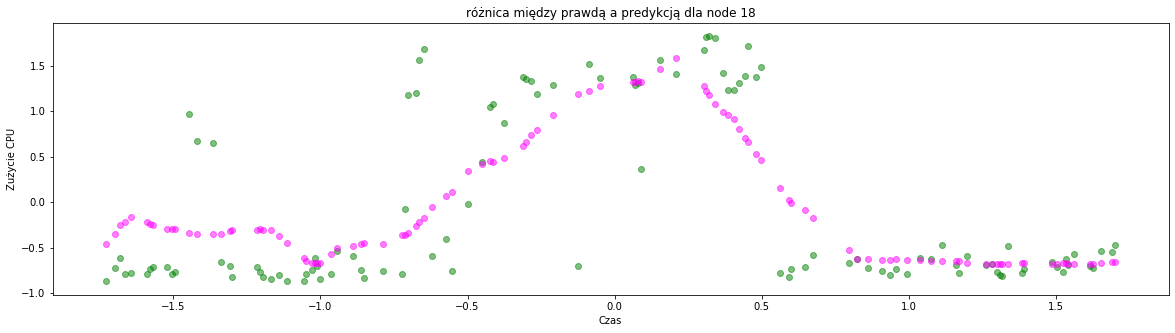

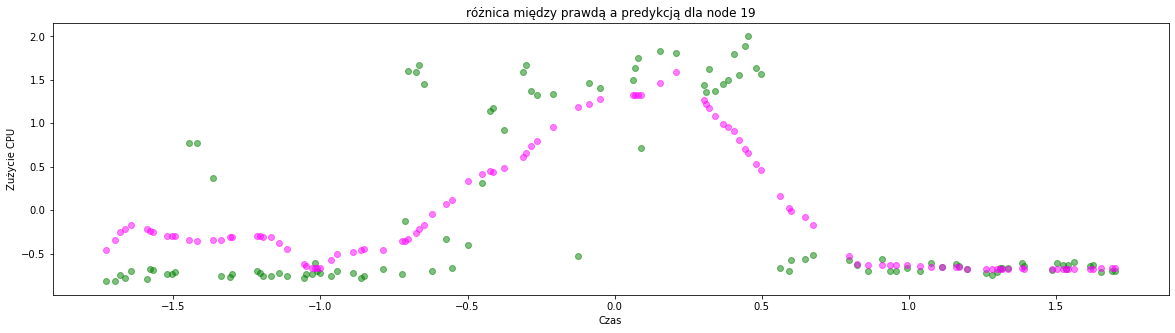

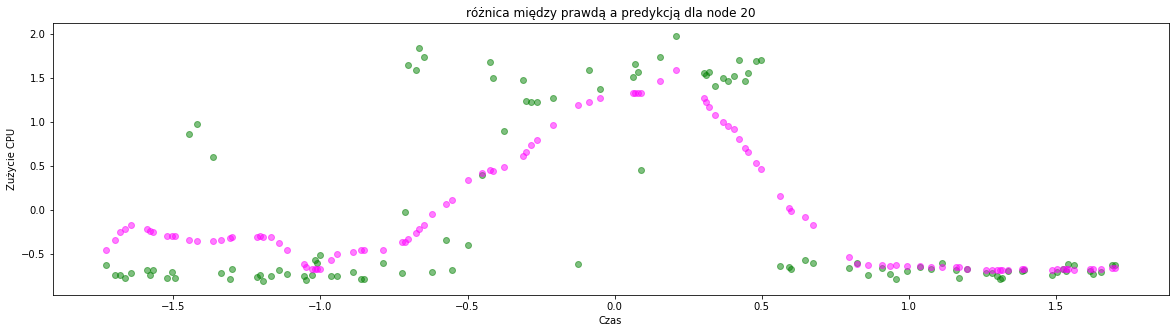

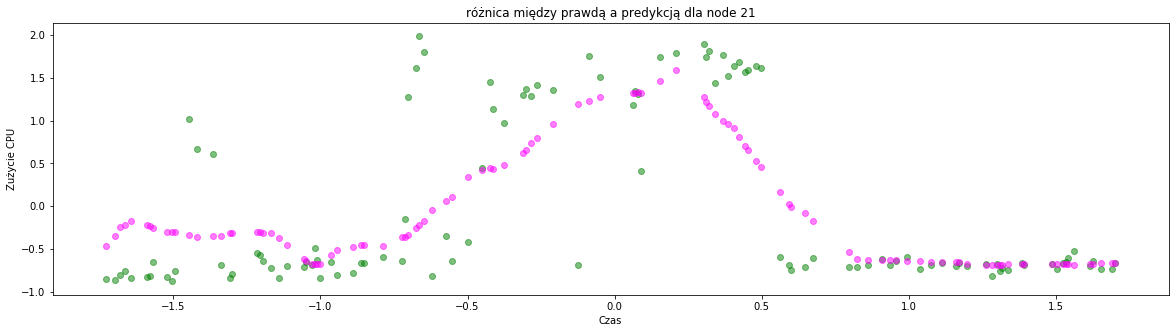

In [32]:
from sklearn.neighbors import RadiusNeighborsRegressor

RadiusNeighbors_Regressor_3 = run(model=RadiusNeighborsRegressor(radius=0.3), data=data, name='RadiusNeighbors_Regressor(0.3)')

# Wyniki

In [33]:
output = [
    SVR_rbf,
    SVR_poly,
    LinearSVR,
    NuSVR,
    DecisionTree_Regressor,
    Linear_Regression,
    Huber_Regression,
    Theil_Sen_Regressor,
    KNeighbors_Regressor_5,
    KNeighbors_Regressor_2,
    RadiusNeighbors_Regressor,
    RadiusNeighbors_Regressor_3
]

In [34]:
from tabulate import tabulate

print(tabulate(output, headers=['Name', 'n18', 'n19', 'n20', 'n21', 'SUM']))

Name                                 n18       n19       n20       n21       SUM
------------------------------  --------  --------  --------  --------  --------
SVR_rbf                         0.567115  0.581414  0.608312  0.614418  2.37126
SVR_poly                        1.08203   1.14368   1.14506   1.14842   4.51918
LinearSVR                       1.1014    1.16387   1.16478   1.16803   4.59809
NuSVR                           0.566128  0.581242  0.607567  0.614478  2.36941
DecisionTree_Regressor(42)      0.329236  0.344318  0.325715  0.298599  1.29787
Linear_Regression               0.959442  1.00113   1.00152   1.00923   3.97131
Huber_Regression                1.03014   1.08945   1.09032   1.09471   4.30462
Theil_Sen_Regressor             0.990707  1.04643   1.04762   1.05274   4.1375
KNeighbors_Regressor(5)         0.290274  0.283868  0.312343  0.292601  1.17909
KNeighbors_Regressor(2)         0.223738  0.199478  0.19642   0.181027  0.800663
RadiusNeighbors_Regressor(0.1)  0.4354